This is simple Julia implementation of embeddings - ref. http://www.cs.colorado.edu/%7Elizb/papers/ida-chapter.pdf and prof. Liz Bradley's course on Complexity Explorer

### Reading the data and creating embedding
First, we read the input data

In [12]:
using DelimitedFiles
data = readdlm("amplitude.dat")

5000×1 Array{Float64,2}:
  3.61
  4.31
  4.83
  5.18
  5.36
  5.31
  5.15
  4.92
  4.23
  3.53
  2.84
  1.86
  0.89
  ⋮   
 -0.32
  1.25
  2.53
  4.03
  5.39
  6.38
  7.38
  8.17
  8.5 
  8.75
  8.68
  8.22

In [17]:
data[1:2:5]

3-element Array{Float64,1}:
 3.61
 4.83
 5.36

In [19]:
n = size(data,1)
τ = 8
m = 7
data[n:-τ:n-τ*(m-1)]

7-element Array{Float64,1}:
   8.22
   4.03
  -5.92
  -4.3 
  11.66
   5.86
 -12.55

### Embedding finction: time series data to m-dimentional data

In [49]:
function embed(data,τ,m) # create time-delayed embedding of time series, with delay τ, of m dimensions
    emb = []
    i = size(data,1) # index
    while (i-τ*(m-1)) > 0
        v = data[i:-τ:i-τ*(m-1)]
        push!(emb,v)
        i = i-1
    end
    return emb # returns array of vectors
end

embed (generic function with 1 method)

In [50]:
emb = embed(data,8,7)

4952-element Array{Any,1}:
 [8.22, 4.03, -5.92, -4.3, 11.66, 5.86, -12.55]  
 [8.68, 2.53, -6.54, -3.3, 15.37, 3.08, -13.26]  
 [8.75, 1.25, -6.89, -2.21, 16.39, 0.25, -13.64] 
 [8.5, -0.32, -6.92, -1.15, 15.97, -2.5, -13.5]  
 [8.17, -1.64, -6.79, 0.03, 14.83, -5.12, -12.97]
 [7.38, -2.99, -6.55, 1.44, 13.04, -7.59, -12.0] 
 [6.38, -4.06, -5.95, 3.18, 11.02, -9.57, -10.66]
 [5.39, -5.03, -5.25, 6.58, 8.47, -11.25, -8.87] 
 [4.03, -5.92, -4.3, 11.66, 5.86, -12.55, -6.97] 
 [2.53, -6.54, -3.3, 15.37, 3.08, -13.26, -5.01] 
 [1.25, -6.89, -2.21, 16.39, 0.25, -13.64, -2.71]
 [-0.32, -6.92, -1.15, 15.97, -2.5, -13.5, -0.48]
 [-1.64, -6.79, 0.03, 14.83, -5.12, -12.97, 1.76]
 ⋮                                               
 [-9.04, -6.66, 6.15, 6.61, -3.61, -5.98, 1.86]  
 [-10.08, -5.04, 7.17, 5.57, -4.72, -5.4, 2.84]  
 [-10.48, -3.47, 7.84, 4.23, -5.58, -4.46, 3.53] 
 [-10.69, -1.75, 8.36, 3.02, -6.23, -3.47, 4.23] 
 [-10.55, 0.05, 8.6, 1.66, -6.66, -2.5, 4.92]    
 [-10.09, 1.84, 8.5, 0.

### Plotting function: plot 2D projection of the embedded data

In [73]:
using Plots; using GR
gr()

function proj2d(emb,d1::Int,d2::Int) # emb is the embedded data; d1 and d2 are the plotted dimensions
    p = size(emb,1)
    xvec = [emb[i][d1] for i in 1:p]
    yvec = [emb[i][d2] for i in 1:p]
    Plots.plot(xvec,yvec,seriestype=:scatter,title="Coordinate-delayed Embedding",marker=(:none,1),legend=nothing,fmt=:png)
end

proj2d (generic function with 2 methods)

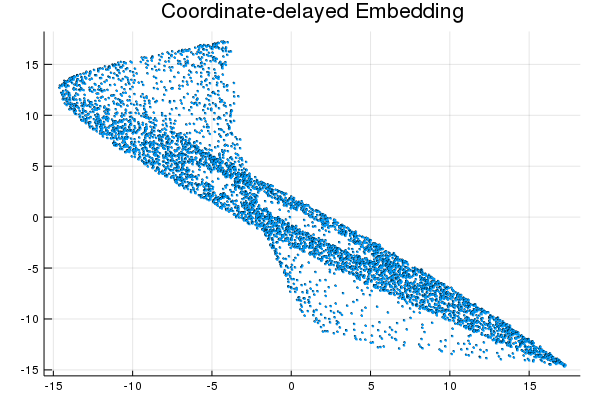

In [68]:
proj2d(emb,1,3)

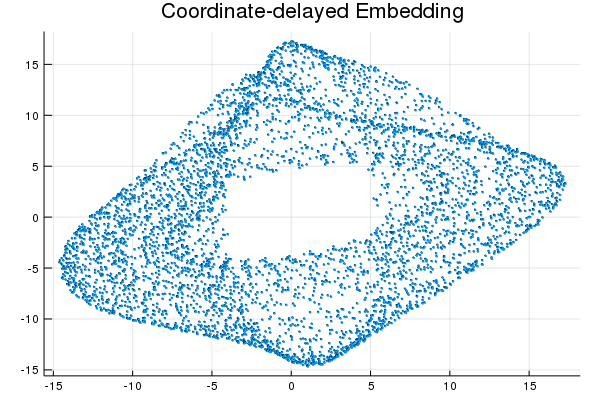

In [57]:
proj2d(embed(data,20,5),1,3)

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:τ=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
10), Observable{Int64} with 2 listeners. Value:
10, Scope("knockout-component-898496df-9b2c-44d8-8137-b06cf0406ba1", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["τ"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/pidgorns/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/pidgorns/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/pidgorns/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/pidgorns/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/pidgorns/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":10}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-898496df-9b2c-44d8-8137-b06cf0406ba1\",\"id\":\"ob_26\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-898496df-9b2c-44d8-8137-b06cf0406ba1\",\"id\":\"ob_25\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    se
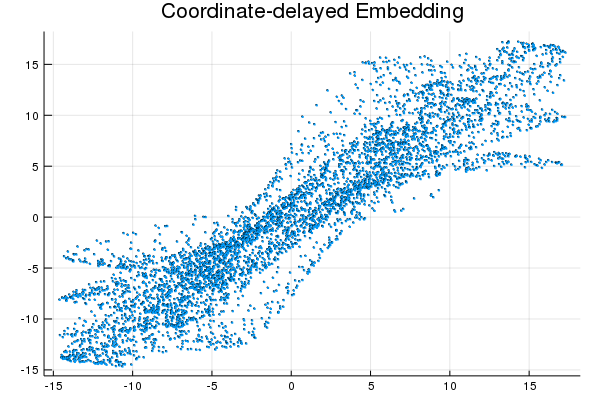
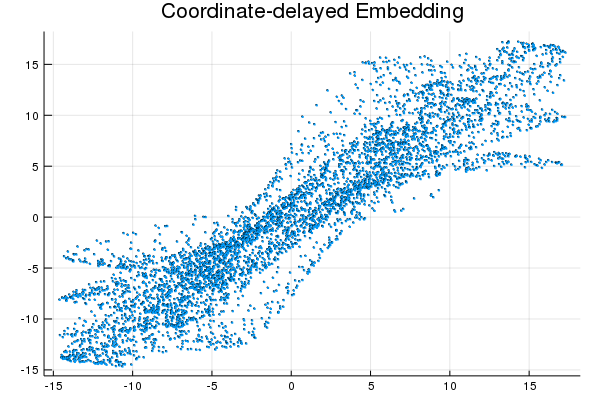

In [72]:
using Interact

@manipulate for τ=1:20, m=2:20     
    proj2d(embed(data,τ,m),1,m)
end